In [1]:
import pandas as pd
loan_data = pd.read_csv("loan_data.csv")
print(loan_data.shape)
loan_data.head(100)

(9578, 14)


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,debt_consolidation,0.0775,156.11,10.714418,5.00,762,2131.000000,1359,5.6,2,0,0,0
96,1,debt_consolidation,0.1154,329.95,12.323856,20.00,727,10292.000000,107501,44.8,2,0,0,0
97,1,all_other,0.0807,313.67,12.061047,0.72,787,8010.000000,3054,5.6,3,0,0,0
98,1,all_other,0.0807,297.99,11.407565,2.44,792,8717.958333,40384,9.6,0,0,0,0


## Data dictionary

|    | Variable          | Explanation                                                                                                             |
|---:|:------------------|:------------------------------------------------------------------------------------------------------------------------|
|  0 | credit_policy     | 1 if the customer meets the credit underwriting criteria; 0 otherwise.                                                  |
|  1 | purpose           | The purpose of the loan.                                                                                                |
|  2 | int_rate          | The interest rate of the loan (more risky borrowers are assigned higher interest rates).                                |
|  3 | installment       | The monthly installments owed by the borrower if the loan is funded.                                                    |
|  4 | log_annual_inc    | The natural log of the self-reported annual income of the borrower.                                                     |
|  5 | dti               | The debt-to-income ratio of the borrower (amount of debt divided by annual income).                                     |
|  6 | fico              | The FICO credit score of the borrower.                                                                                  |
|  7 | days_with_cr_line | The number of days the borrower has had a credit line.                                                                  |
|  8 | revol_bal         | The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).                           |
|  9 | revol_util        | The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available). |
| 10 | inq_last_6mths    | The borrower's number of inquiries by creditors in the last 6 months.                                                   |
| 11 | delinq_2yrs       | The number of times the borrower had been 30+ days past due on a payment in the past 2 years.                           |
| 12 | pub_rec           | The borrower's number of derogatory public records.                                                                     |
| 13 | not_fully_paid    | 1 if the loan is not fully paid; 0 otherwise.   

[Source](https://www.kaggle.com/itssuru/loan-data) of dataset.

In [3]:
import pandas as pd

numeric_columns = loan_data.select_dtypes(include=['number'])

correlation_matrix = numeric_columns.corr()

print(correlation_matrix)


                   credit.policy  int.rate  installment  log.annual.inc  \
credit.policy           1.000000 -0.294089     0.058770        0.034906   
int.rate               -0.294089  1.000000     0.276140        0.056383   
installment             0.058770  0.276140     1.000000        0.448102   
log.annual.inc          0.034906  0.056383     0.448102        1.000000   
dti                    -0.090901  0.220006     0.050202       -0.054065   
fico                    0.348319 -0.714821     0.086039        0.114576   
days.with.cr.line       0.099026 -0.124022     0.183297        0.336896   
revol.bal              -0.187518  0.092527     0.233625        0.372140   
revol.util             -0.104095  0.464837     0.081356        0.054881   
inq.last.6mths         -0.535511  0.202780    -0.010419        0.029171   
delinq.2yrs            -0.076318  0.156079    -0.004368        0.029203   
pub.rec                -0.054243  0.098162    -0.032760        0.016506   
not.fully.paid         -0

In [8]:
numeric_columns = loan_data.select_dtypes(include=['number'])

correlation_by_purpose = {}

grouped = loan_data.groupby('purpose')
for purpose, group in grouped:
    group_numeric = group.select_dtypes(include=['number'])
    correlation_matrix = group_numeric.corr()
    correlation_by_purpose[purpose] = correlation_matrix

for purpose, correlation_matrix in correlation_by_purpose.items():
    print(f"Correlation Matrix for Purpose: {purpose}")
    print(correlation_matrix)
    print("\n")



Correlation Matrix for Purpose: all_other
                   credit.policy  int.rate  installment  log.annual.inc  \
credit.policy           1.000000 -0.291381     0.078583        0.052927   
int.rate               -0.291381  1.000000     0.194092       -0.020271   
installment             0.078583  0.194092     1.000000        0.430106   
log.annual.inc          0.052927 -0.020271     0.430106        1.000000   
dti                    -0.070075  0.220744    -0.056957       -0.051873   
fico                    0.352233 -0.740540     0.120183        0.145414   
days.with.cr.line       0.111318 -0.169031     0.152162        0.360193   
revol.bal              -0.177553  0.051016     0.185714        0.356861   
revol.util             -0.129371  0.438085    -0.040619        0.039530   
inq.last.6mths         -0.525698  0.217402    -0.021301        0.014071   
delinq.2yrs            -0.087083  0.180566     0.007689        0.068901   
pub.rec                -0.032760  0.086068    -0.022139   

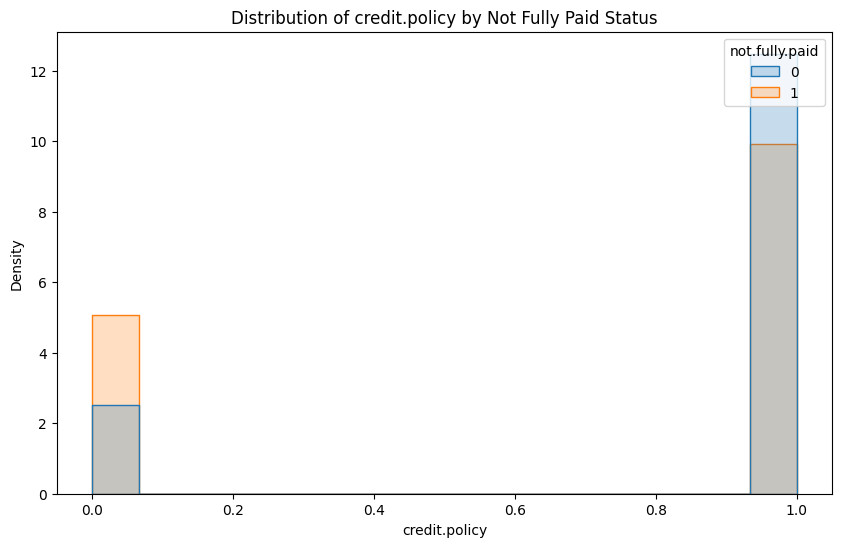

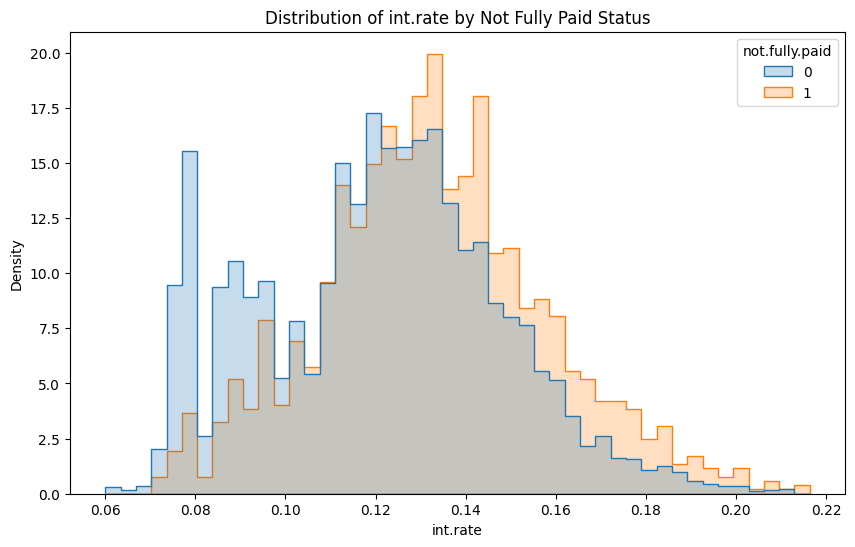

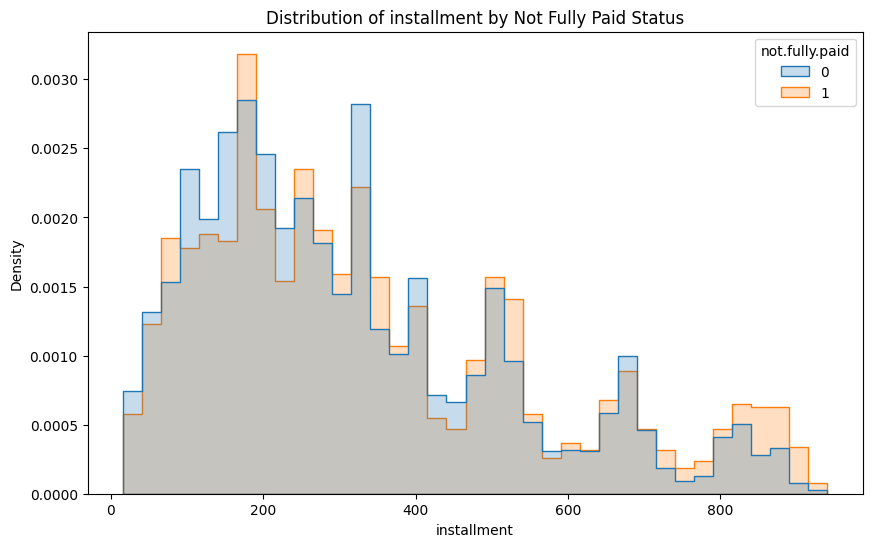

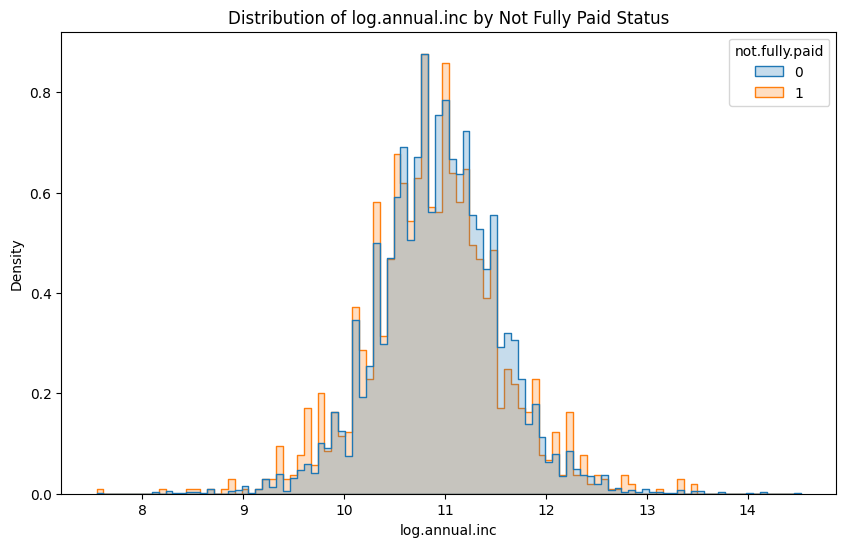

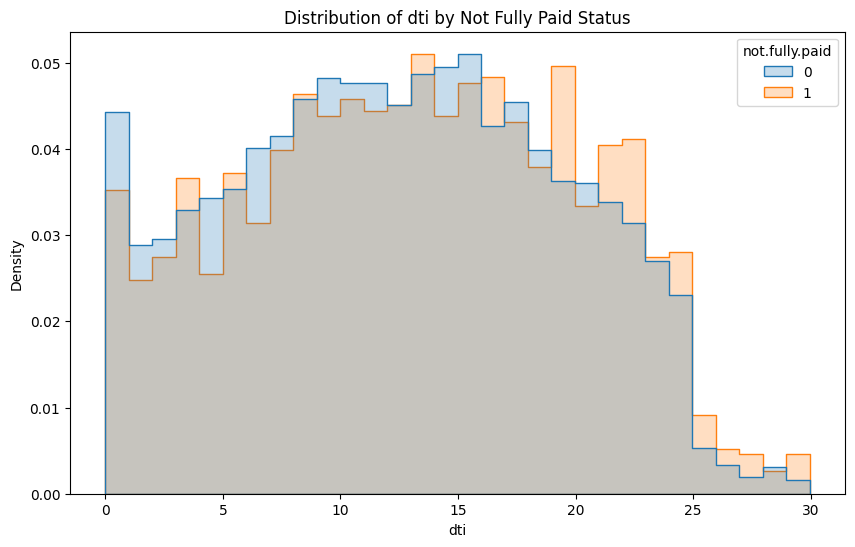

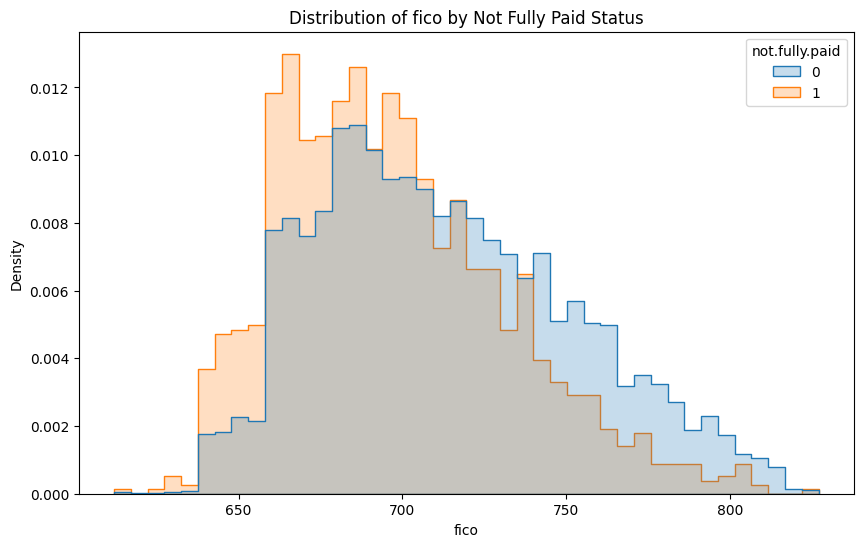

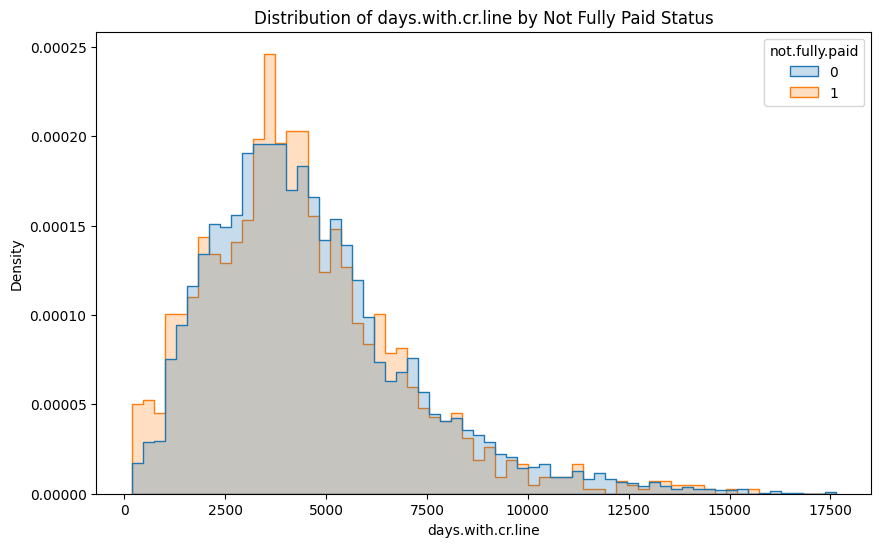

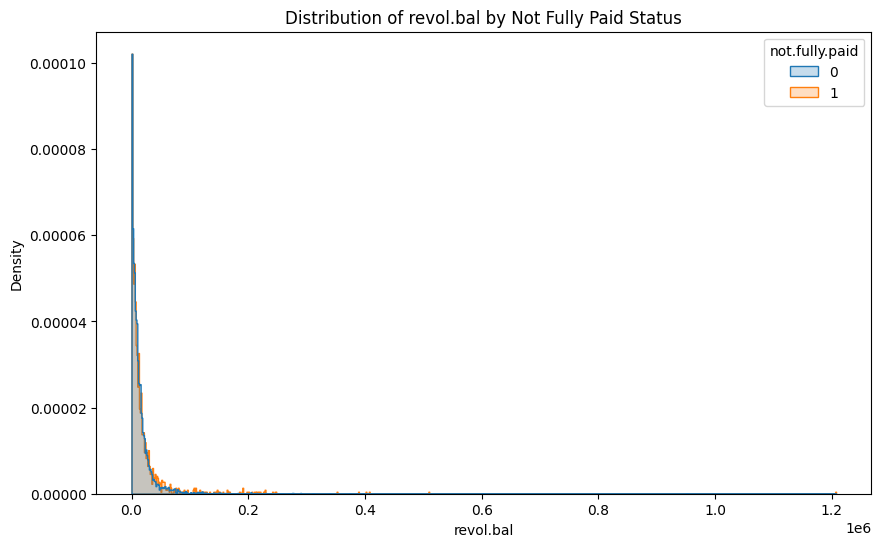

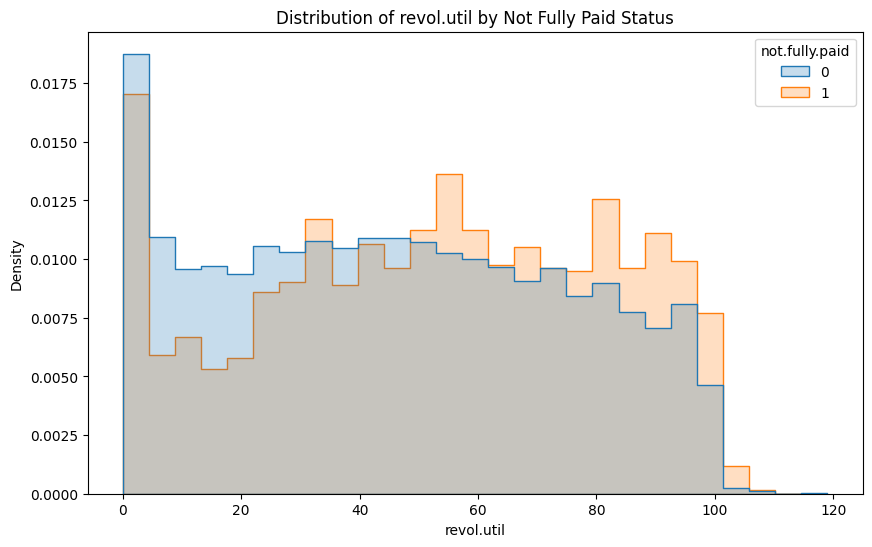

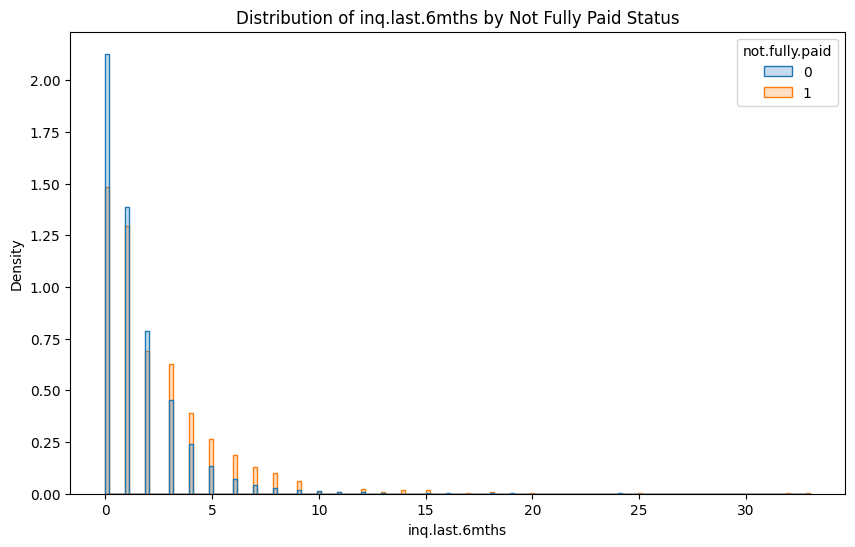

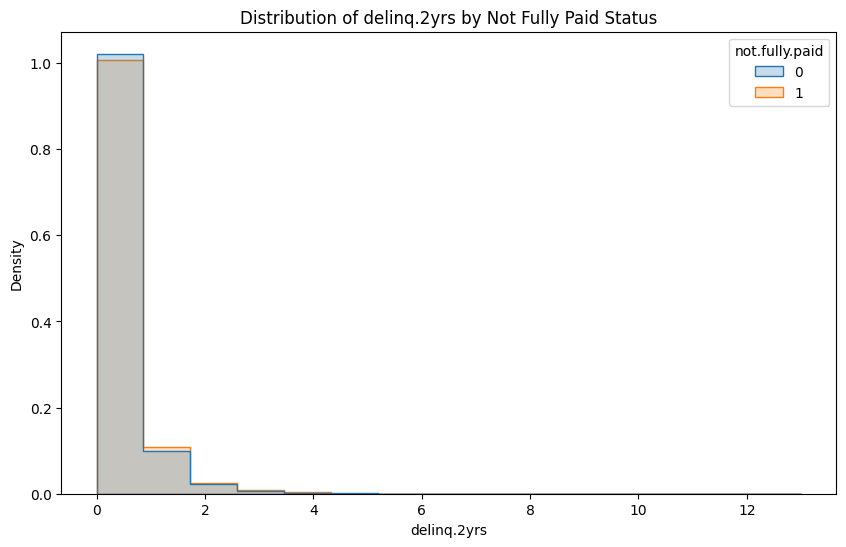

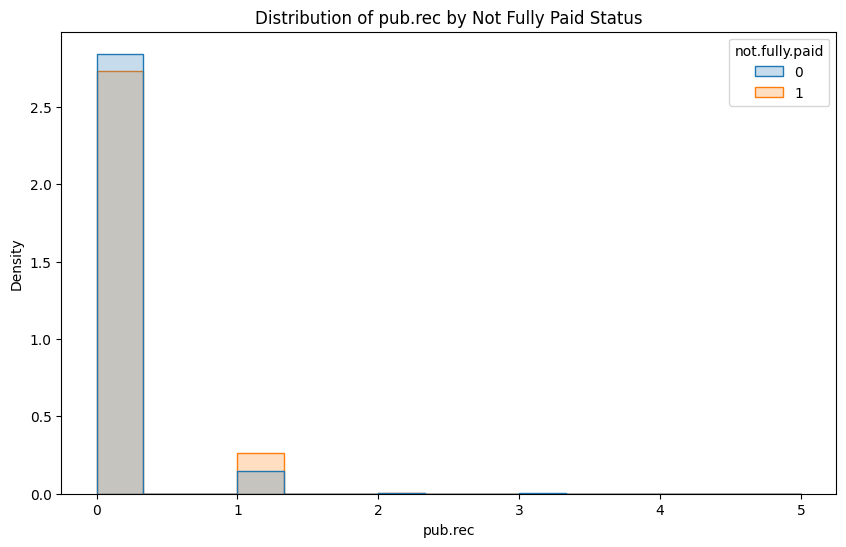

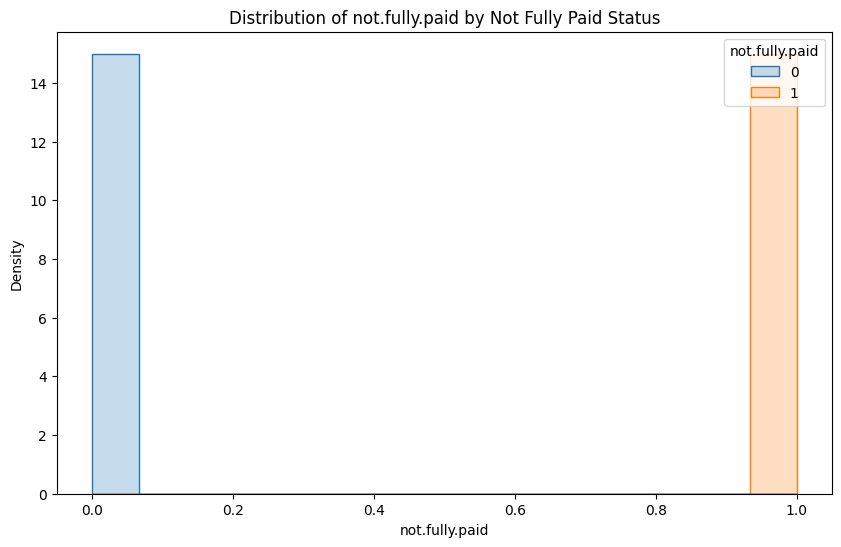

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

numeric_columns = loan_data.select_dtypes(include='number').columns

for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=loan_data, x=col, hue="not.fully.paid", stat="density", common_norm=False, element="step")
    plt.title(f'Distribution of {col} by Not Fully Paid Status')
    plt.show()



One hot encoding purpose column

In [14]:
# One-hot encoding 'purpose' column
loan_data = pd.get_dummies(loan_data, columns=['purpose'], drop_first=True)


In [27]:
loan_data

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,0.492222,-0.139318,2.463099,0.680388,0.998505,0.688825,0.432230,0.353732,0.182704,-0.716989,-0.299730,-0.237003,0,False,True,False,False,False,False
1,0.492222,-0.578868,-0.438854,0.244031,0.244540,-0.101303,-0.721230,0.495018,1.030602,-0.716989,-0.299730,-0.237003,0,True,False,False,False,False,False
2,0.492222,0.486484,0.230708,-0.908659,-0.141885,-0.759742,0.059770,-0.397073,-0.730683,-0.262470,-0.299730,-0.237003,0,False,True,False,False,False,False
3,0.492222,-0.813544,-0.757022,0.680388,-0.654697,0.030385,-0.745277,0.496321,0.909966,-0.262470,-0.299730,-0.237003,0,False,True,False,False,False,False
4,0.492222,0.743509,-1.043992,0.597961,0.343326,-1.154806,-0.198161,-0.360663,-0.251586,-0.716989,1.531147,-0.237003,0,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,-2.031603,0.873884,0.123976,2.031030,-0.322023,-1.023118,2.368325,5.879467,1.216726,0.192048,-0.299730,-0.237003,2,False,False,False,False,False,False
9574,-2.031603,0.099083,-0.296481,0.341170,-1.800898,0.293761,-0.072400,-0.495638,-1.575135,1.555604,-0.299730,-0.237003,2,False,False,False,False,False,False
9575,-2.031603,-0.578868,-1.068670,-0.545694,0.070213,-0.628054,-0.444860,-0.203765,1.244300,2.919159,-0.299730,-0.237003,2,False,True,False,False,False,False
9576,-2.031603,1.391660,0.156914,-0.182730,0.954924,-0.496366,-1.105722,-0.501089,-1.502753,1.555604,-0.299730,-0.237003,2,False,False,False,True,False,False


Standard scaling on numeric columns

In [17]:
from sklearn.preprocessing import StandardScaler

numeric_columns = loan_data.select_dtypes(include=['number'])

scaler = StandardScaler()

loan_data[numeric_columns.columns] = scaler.fit_transform(loan_data[numeric_columns.columns])


In [21]:
from imblearn.over_sampling import SMOTE

X = loan_data.drop('not.fully.paid', axis=1)
y = loan_data['not.fully.paid']

smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X, y)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

logistic_model = LogisticRegression(random_state=42)

logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)


Accuracy: 0.632069608452455
              precision    recall  f1-score   support

           0       0.63      0.64      0.63      1614
           2       0.63      0.63      0.63      1604

    accuracy                           0.63      3218
   macro avg       0.63      0.63      0.63      3218
weighted avg       0.63      0.63      0.63      3218

Confusion Matrix:
[[1025  589]
 [ 595 1009]]


In [23]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(random_state=42)

decision_tree_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = decision_tree_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)


Accuracy: 0.8178993163455562
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      1614
           2       0.79      0.86      0.82      1604

    accuracy                           0.82      3218
   macro avg       0.82      0.82      0.82      3218
weighted avg       0.82      0.82      0.82      3218

Confusion Matrix:
[[1260  354]
 [ 232 1372]]


In [24]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(random_state=42)

random_forest_model.fit(X_train, y_train)

y_pred = random_forest_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)


Accuracy: 0.9021131137352393
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      1614
           2       0.91      0.90      0.90      1604

    accuracy                           0.90      3218
   macro avg       0.90      0.90      0.90      3218
weighted avg       0.90      0.90      0.90      3218

Confusion Matrix:
[[1464  150]
 [ 165 1439]]


In [25]:
import pickle

model_filename = 'random_forest_model.pkl'

with open(model_filename, 'wb') as model_file:
    pickle.dump(random_forest_model, model_file)

print(f"RandomForestClassifier model saved as '{model_filename}'")


RandomForestClassifier model saved as 'random_forest_model.pkl'
